## Importing required libraries and reading the Dataset 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('Final_Dataset_Phones.csv')

### Printing Head to get glimpse of Dataset

In [4]:
df.head(5)

,ProductID,helpful,Rating,Review,reviewTime,reviewerName,summary
0,B0000SX2UC,1.0,3,I had the Samsung A600 for awhile which is abs...,11-Oct-05,Janet,"Def not best, but not worst"
1,B0000SX2UC,17.0,1,Due to a software issue between Nokia and Spri...,7-Jan-04,Luke Wyatt,Text Messaging Doesn't Work
2,B0000SX2UC,5.0,5,"This is a great, reliable phone. I also purcha...",30-Dec-03,Brooke,Love This Phone
3,B0000SX2UC,1.0,3,"I love the phone and all, because I really did...",18-Mar-04,amy m. teague,"Love the Phone, BUT...!"
4,B0000SX2UC,1.0,4,The phone has been great for every purpose it ...,28-Aug-05,tristazbimmer,"Great phone service and options, lousy case!"


### Size of Dataset

In [5]:
df.shape

(67986, 7)

### Columns in Dataframe

In [6]:
df.columns

Index(['ProductID', 'helpful', 'Rating', 'Review', 'reviewTime',
       'reviewerName', 'summary'],
      dtype='object')

### Datatype in each Column

In [7]:
df.dtypes

ProductID        object
helpful         float64
Rating            int64
Review           object
reviewTime       object
reviewerName     object
summary          object
dtype: object

### Descriptive Statistics of Dataset

In [8]:
df.describe()

,helpful,Rating
count,27215.000000,67986.000000
mean,8.229690,3.807916
std,31.954877,1.582906
min,1.000000,1.000000
25%,1.000000,3.000000
50%,2.000000,5.000000
75%,5.000000,5.000000
max,990.000000,5.000000


### Info of Dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67986 entries, 0 to 67985
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductID     67986 non-null  object 
 1   helpful       27215 non-null  float64
 2   Rating        67986 non-null  int64  
 3   Review        67960 non-null  object 
 4   reviewTime    67986 non-null  object 
 5   reviewerName  67983 non-null  object 
 6   summary       67957 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 3.6+ MB


### Handling Missing Data

In [10]:
df = df.drop(columns=['reviewerName','helpful'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67986 entries, 0 to 67985
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ProductID   67986 non-null  object
 1   Rating      67986 non-null  int64 
 2   Review      67960 non-null  object
 3   reviewTime  67986 non-null  object
 4   summary     67957 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.6+ MB


In [12]:
df = df.dropna(how='any')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67937 entries, 0 to 67985
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ProductID   67937 non-null  object
 1   Rating      67937 non-null  int64 
 2   Review      67937 non-null  object
 3   reviewTime  67937 non-null  object
 4   summary     67937 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.1+ MB


In [14]:
df.shape

(67937, 5)

In [15]:
df.describe()

,Rating
count,67937.000000
mean,3.807778
std,1.582910
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


### Feature Engineering

In [16]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'], errors = 'coerce')

C:\Users\bysan\AppData\Local\Temp\ipykernel_6688\3276717613.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['reviewTime'] = pd.to_datetime(df['reviewTime'], errors = 'coerce')


In [17]:
df.head()

,ProductID,Rating,Review,reviewTime,summary
0,B0000SX2UC,3,I had the Samsung A600 for awhile which is abs...,2005-10-11,"Def not best, but not worst"
1,B0000SX2UC,1,Due to a software issue between Nokia and Spri...,2004-01-07,Text Messaging Doesn't Work
2,B0000SX2UC,5,"This is a great, reliable phone. I also purcha...",2003-12-30,Love This Phone
3,B0000SX2UC,3,"I love the phone and all, because I really did...",2004-03-18,"Love the Phone, BUT...!"
4,B0000SX2UC,4,The phone has been great for every purpose it ...,2005-08-28,"Great phone service and options, lousy case!"


Adding adiitional fields

In [18]:
df['Review_length'] = df['Review'].apply(lambda x: len(x))
df['Summary_length'] = df['summary'].apply(lambda x: len(x))
df.head()

,ProductID,Rating,Review,reviewTime,summary,Review_length,Summary_length
0,B0000SX2UC,3,I had the Samsung A600 for awhile which is abs...,2005-10-11,"Def not best, but not worst",1688,27
1,B0000SX2UC,1,Due to a software issue between Nokia and Spri...,2004-01-07,Text Messaging Doesn't Work,748,27
2,B0000SX2UC,5,"This is a great, reliable phone. I also purcha...",2003-12-30,Love This Phone,768,15
3,B0000SX2UC,3,"I love the phone and all, because I really did...",2004-03-18,"Love the Phone, BUT...!",524,23
4,B0000SX2UC,4,The phone has been great for every purpose it ...,2005-08-28,"Great phone service and options, lousy case!",606,44


## Visualization

### Distribution of Ratings

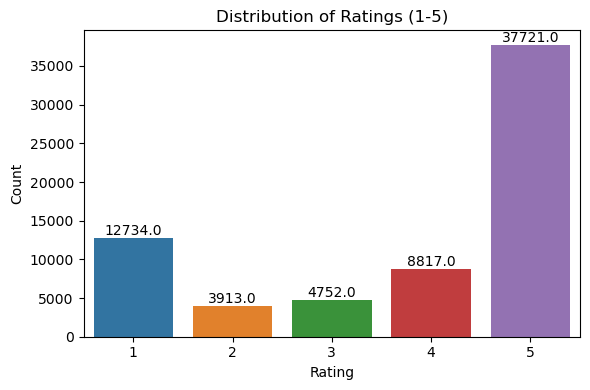

In [19]:
# Filter only the standard ratings (1 to 5)
amazon_data_viz = df[df['Rating'].isin([1, 2, 3, 4, 5])]

# Plotting the distribution of ratings
plt.figure(figsize=(6, 4))
sns.countplot(data=amazon_data_viz, x='Rating', order=[1, 2, 3, 4, 5])
plt.title('Distribution of Ratings (1-5)')
plt.ylabel('Count')
plt.xlabel('Rating')

# Adding annotations
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Sentiment based on ratings

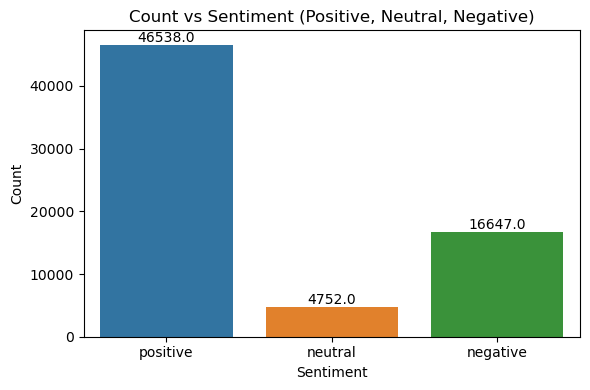

In [20]:
# Defining the categorize_sentiment function
def categorize_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

# Create a copy of the DataFrame
amazon_data_viz = df.copy()

# Categorizing reviews based on rating for sentiment (polarity)
amazon_data_viz['sentiment'] = amazon_data_viz['Rating'].apply(categorize_sentiment)

# Plotting the distribution of sentiments
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=amazon_data_viz, x='sentiment', order=['positive', 'neutral', 'negative'])
plt.title('Count vs Sentiment (Positive, Neutral, Negative)')
plt.ylabel('Count')
plt.xlabel('Sentiment')

# Adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Balancing the dataset to perform sentiment anlysis

In [21]:
from sklearn.utils import resample

# Categorizing the reviews into broader sentiment categories: Positive (4-5 stars), Neutral (3 stars), Negative (1-2 stars)
df['Sentiment'] = pd.cut(df['Rating'], bins=[0, 2, 3, 5], labels=['Negative', 'Neutral', 'Positive'])

# Splitting the dataset into the different sentiment categories
negative_reviews = df[df['Sentiment'] == 'Negative']
neutral_reviews = df[df['Sentiment'] == 'Neutral']
positive_reviews = df[df['Sentiment'] == 'Positive']

# Finding the maximum number of reviews in any sentiment category
max_size = max(df['Sentiment'].value_counts())

# Oversampling the minority classes
negative_upsampled = resample(negative_reviews,
                              replace=True,     # sample with replacement
                              n_samples=max_size,    # to match majority class
                              random_state=123) # reproducible results

neutral_upsampled = resample(neutral_reviews,
                             replace=True,     
                             n_samples=max_size,    
                             random_state=123)

# Combine the majority class with upsampled minority classes
upsampled_data = pd.concat([positive_reviews, negative_upsampled, neutral_upsampled])

# Checking the new class distribution
upsampled_data['Sentiment'].value_counts()

Sentiment
Negative    46538
Neutral     46538
Positive    46538
Name: count, dtype: int64

### Categorising the reviews based on Rating given by consumers

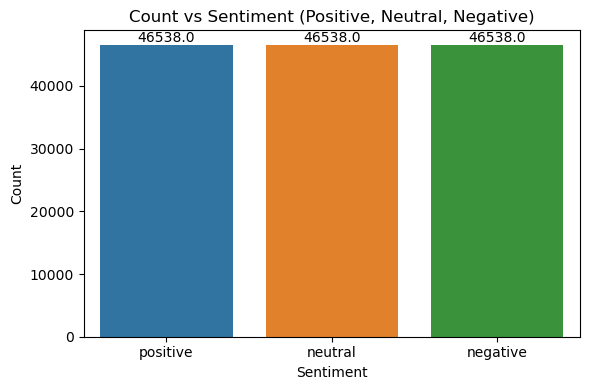

In [22]:
# Defining the categorize_sentiment function
def categorize_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

# Create a copy of the DataFrame
amazon_data_viz = upsampled_data.copy()

# Categorizing reviews based on rating for sentiment (polarity)
amazon_data_viz['sentiment'] = amazon_data_viz['Rating'].apply(categorize_sentiment)

# Plotting the distribution of sentiments
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=amazon_data_viz, x='sentiment', order=['positive', 'neutral', 'negative'])
plt.title('Count vs Sentiment (Positive, Neutral, Negative)')
plt.ylabel('Count')
plt.xlabel('Sentiment')

# Adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Distribution of Review Length

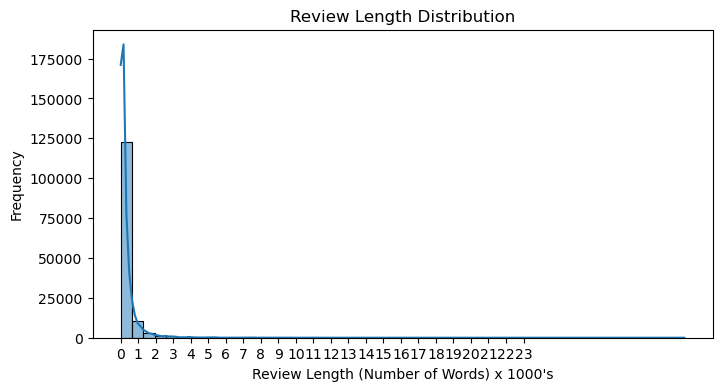

In [23]:
# Plotting
plt.figure(figsize=(8, 4))
sns.histplot(amazon_data_viz['Review_length'], bins = 50, kde=True)
plt.title('Review Length Distribution')
plt.xlabel('Review Length (Number of Words) x 1000\'s')
plt.ylabel('Frequency')

# Scale the x-axis by 1000 units
plt.xticks(np.arange(0, 24000, 1000), np.arange(0, 24, 1))

plt.show()


# Handling Outliers

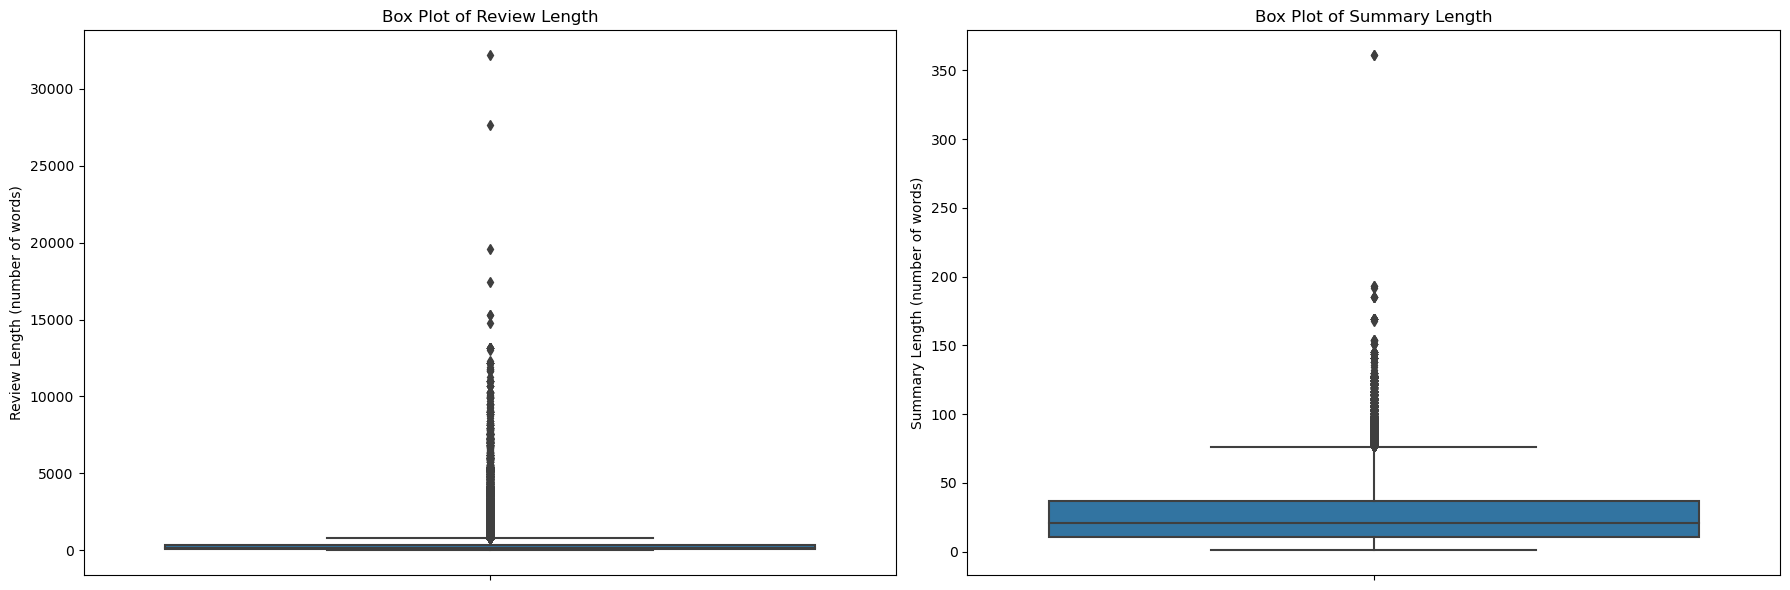

(count    139614.000000
 mean        334.866117
 std         650.836646
 min           1.000000
 25%          61.000000
 50%         152.000000
 75%         356.000000
 max       32182.000000
 Name: Review_length, dtype: float64,
 count    139614.000000
 mean         27.092390
 std          20.340471
 min           1.000000
 25%          11.000000
 50%          21.000000
 75%          37.000000
 max         361.000000
 Name: Summary_length, dtype: float64)

In [24]:
# Get the distribution of the new features
review_length_distribution = upsampled_data['Review_length'].describe()
summary_length_distribution = upsampled_data['Summary_length'].describe()

# Set up the matplotlib figure for the new features
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Box plot for 'review_length'
sns.boxplot(data=upsampled_data, y='Review_length', ax=axes[0], showfliers=True)
axes[0].set_title('Box Plot of Review Length')
axes[0].set_ylabel('Review Length (number of words)')

# Box plot for 'summary_length'
sns.boxplot(data=upsampled_data, y='Summary_length', ax=axes[1], showfliers=True)
axes[1].set_title('Box Plot of Summary Length')
axes[1].set_ylabel('Summary Length (number of words)')

plt.tight_layout()
plt.show()

(review_length_distribution, summary_length_distribution)

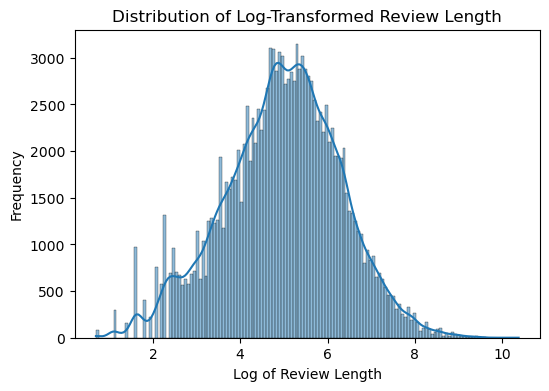

In [25]:
import numpy as np

# Apply log transformation to the review_length column, adding 1 to handle log(0) cases
upsampled_data['log_review_length'] = np.log1p(upsampled_data['Review_length'])

# Get the distribution of the log_review_length
log_review_length_distribution = upsampled_data['log_review_length'].describe()

# Plot the distribution of log_review_length
plt.figure(figsize=(6, 4))
sns.histplot(upsampled_data['log_review_length'], kde=True)
plt.title('Distribution of Log-Transformed Review Length')
plt.xlabel('Log of Review Length')
plt.ylabel('Frequency')
plt.show()

### Wordcloud for Sentiment Analysis based on Rating

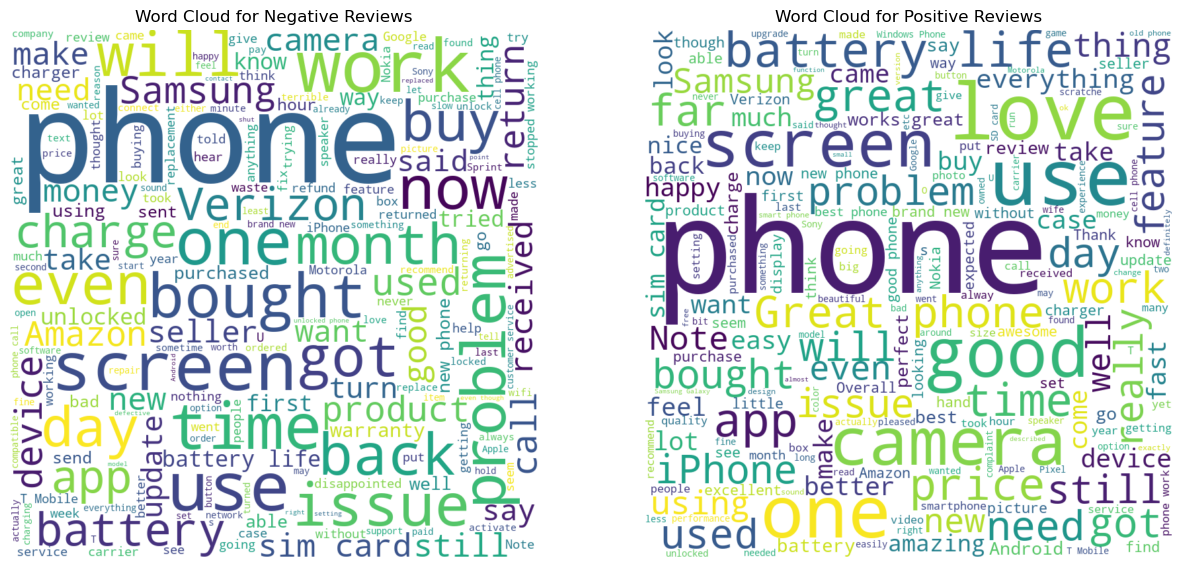

In [26]:
from wordcloud import WordCloud

# Filter negative & positive reviews and create a combined text
negative_reviews_text = ' '.join(amazon_data_viz[amazon_data_viz['Rating'] <= 2]['Review'].astype(str))
positive_reviews_text = ' '.join(amazon_data_viz[amazon_data_viz['Rating'] > 3]['Review'].astype(str))

# Create and display word cloud
wordcloud_n = WordCloud(background_color='white', width=800, height=800, max_words=200).generate(negative_reviews_text)
wordcloud_p = WordCloud(background_color='white', width=800, height=800, max_words=200).generate(positive_reviews_text)

plt.figure(figsize=(15, 7))

# Subplot 1: Word Cloud for Negative Reviews
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_n, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')

# Subplot 2: Word Cloud for Positive Reviews
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_p, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')


plt.show()


### Correlation heatmap

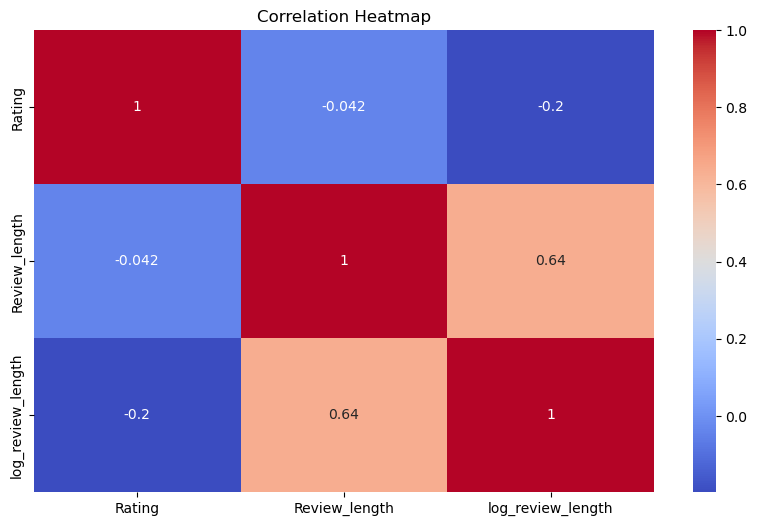

In [28]:
# Plotting correlation heatmap
correlation_matrix = upsampled_data[['Rating', 'Review_length', 'log_review_length']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [29]:
Brands_df = pd.read_csv("Brands.csv")

In [30]:
import math
Brands_list = Brands_df['brand'].unique().tolist()
Brands_list = [x.lower() for x in Brands_list if not isinstance(x, float) or not math.isnan(x)]
Brands_set = set(Brands_list)
Brands_set

{'apple',
 'asus',
 'google',
 'huawei',
 'motorola',
 'nokia',
 'oneplus',
 'samsung',
 'sony',
 'xiaomi'}

## Data Preprocessing/ Cleaning

In [31]:
import numpy as np
import unicodedata
import pandas as pd
import string
punctuation = string.punctuation
import nltk
import re
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer # converts text data into numerical format
import re
stop_words = set(stopwords.words("english"))
combined_set = stop_words | Brands_set
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

import string
punctuation = string.punctuation
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

# Create a function to remove special characters
def remove_special_characters(text):
    pat = r'[^a-zA-z0-9]'
    return re.sub(pat, ' ', text)


def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text

def remove_stopwords(sentence):
    words = sentence.split()  # Tokenize the sentence into words
    filtered_words = [word for word in words if word.lower() not in combined_set]
    return " ".join(filtered_words)

lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# function for stemming
def get_stem(text):
    stemmer = nltk.porter.PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bysan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bysan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bysan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
upsampled_data['processed_text'] = upsampled_data['Review'].apply(drop_numbers)
upsampled_data['processed_text'] = upsampled_data['processed_text'].apply(punctuation_removal)
upsampled_data['processed_text'] = upsampled_data.apply(lambda x: remove_special_characters(x['processed_text']), axis = 1)
upsampled_data['processed_text'] = upsampled_data.apply(lambda x: remove_accented_chars(x['processed_text']), axis = 1)
upsampled_data['processed_text']= [remove_stopwords(sentence) for sentence in upsampled_data['processed_text']]
upsampled_data['processed_text']= upsampled_data['processed_text'] .map(lemmatize_text)
upsampled_data['processed_text']= upsampled_data['processed_text'] .apply(get_stem)

In [33]:
upsampled_data.head()

,ProductID,Rating,Review,reviewTime,summary,Review_length,Summary_length,Sentiment,log_review_length,processed_text
2,B0000SX2UC,5,"This is a great, reliable phone. I also purcha...",2003-12-30,Love This Phone,768,15,Positive,6.645091,great reliabl phone also purchas phone die men...
4,B0000SX2UC,4,The phone has been great for every purpose it ...,2005-08-28,"Great phone service and options, lousy case!",606,44,Positive,6.408529,phone great everi purpos offer except day boug...
5,B0000SX2UC,4,"Hello, I have this phone and used it until I d...",2005-09-25,Worked great for me,388,19,Positive,5.963579,hello phone use decid buy flip phone problem b...
6,B0000SX2UC,5,Cool. Cheap. Color: 3 words that describe the ...,2004-04-16,Wanna cool Nokia? You have it here!,911,35,Positive,6.815640,cool cheap color word describ perfectli mean w...
7,B0000SX2UC,4,"The 3599i is overall a nice phone, except that...",2004-04-03,Problem with 3588i universal headset,356,36,Positive,5.877736,overal nice phone except made univers headset ...


In [34]:
upsampled_data.shape

(139614, 10)

### Sentiment Analysis using Random forest classifier

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Handle NaN values in the 'processed_text' column
X = upsampled_data['processed_text'].fillna("")
y = upsampled_data['Rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=2000)  # Reduced number of features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize the Random Forest classifier with fewer trees
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the model
rf_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set and evaluate
y_pred = rf_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)


0.8918812448519142
              precision    recall  f1-score   support

           1       0.89      0.96      0.93      7016
           2       0.99      0.88      0.93      2181
           3       0.96      0.98      0.97      9283
           4       0.73      0.08      0.14      1819
           5       0.80      0.92      0.86      7624

    accuracy                           0.89     27923
   macro avg       0.87      0.76      0.76     27923
weighted avg       0.89      0.89      0.87     27923



In [40]:
X_all_tfidf = vectorizer.transform(upsampled_data['processed_text'].fillna(''))
predicted_ratings = rf_classifier.predict(X_all_tfidf)
upsampled_data['Rating_Randfor'] = predicted_ratings

In [41]:
upsampled_data.head()

,ProductID,Rating,Review,reviewTime,summary,Review_length,Summary_length,Sentiment,log_review_length,processed_text,Rating_Randfor,Sentiment_Rand
2,B0000SX2UC,5,"This is a great, reliable phone. I also purcha...",2003-12-30,Love This Phone,768,15,Positive,6.645091,great reliabl phone also purchas phone die men...,1,Negative
4,B0000SX2UC,4,The phone has been great for every purpose it ...,2005-08-28,"Great phone service and options, lousy case!",606,44,Positive,6.408529,phone great everi purpos offer except day boug...,4,Positive
5,B0000SX2UC,4,"Hello, I have this phone and used it until I d...",2005-09-25,Worked great for me,388,19,Positive,5.963579,hello phone use decid buy flip phone problem b...,4,Positive
6,B0000SX2UC,5,Cool. Cheap. Color: 3 words that describe the ...,2004-04-16,Wanna cool Nokia? You have it here!,911,35,Positive,6.815640,cool cheap color word describ perfectli mean w...,5,Positive
7,B0000SX2UC,4,"The 3599i is overall a nice phone, except that...",2004-04-03,Problem with 3588i universal headset,356,36,Positive,5.877736,overal nice phone except made univers headset ...,4,Positive


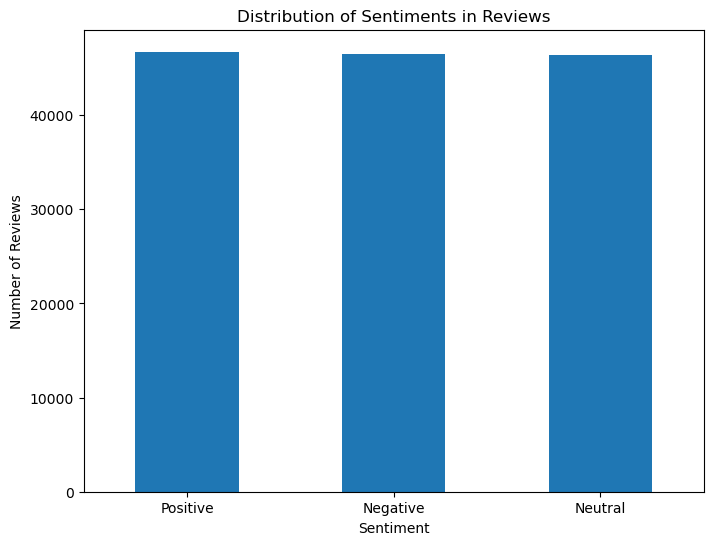

NameError: name 'bars' is not defined

In [42]:
# Define the classify_sentiment function again
def classify_sentiment(rating):
    if rating in [4,5]:
        return 'Positive'
    elif rating in [1,2]:
        return 'Negative'
    else:
        return 'Neutral'

# Since we still have the 'SentimentPolarity' calculated for the sample, we just need to classify it
upsampled_data['Sentiment_Rand'] = upsampled_data['Rating_Randfor'].apply(classify_sentiment)

# Plot the distribution of sentiments in the sample
sample_sentiment_counts = upsampled_data['Sentiment_Rand'].value_counts()
plt.figure(figsize=(8, 6))
sample_sentiment_counts.plot(kind='bar')
plt.title('Distribution of Sentiments in Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

# Annotating the count above each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'), 
                 (bar.get_x() + bar.get_width() / 2, 
                  bar.get_height()), ha='center', va='center',
                 size=10, xytext=(0, 8),
                 textcoords='offset points')

plt.show()


# Show the value counts for the sample
sample_sentiment_counts


In [ ]:
# Function to calculate F_score based on the conditions provided
def calculate_f_score(row):
    if (row['Sentiment_Rand'] == row['Sentiment']):
        return 0
    else:
        return 1

# Calculate F_score for each review in the data
upsampled_data['F_score'] = upsampled_data.apply(calculate_f_score, axis=1)

# Display the first few rows to verify the F_score calculation
upsampled_data.head()


In [81]:
# Create a new DataFrame df_Neg with the conditions provided
upsampled_data_Neg = upsampled_data[(upsampled_data['F_score'] == 0) & (upsampled_data['Sentiment_Rand'] == 'Negative')]

upsampled_data_Pos = upsampled_data[(upsampled_data['F_score'] == 0) & (upsampled_data['Sentiment_Rand'] == 'Positive')]
# Display the first few rows of the df_Neg DataFrame to verify the operation
upsampled_data_Pos.head()
#upsampled_data_Neg.head()

,ProductID,Rating,Review,reviewTime,summary,Review_length,Summary_length,Sentiment,log_review_length,processed_text,Rating_Randfor,Sentiment_Rand,F_score
4,B0000SX2UC,4,The phone has been great for every purpose it ...,2005-08-28,"Great phone service and options, lousy case!",606,44,Positive,6.408529,phone great everi purpos offer except day boug...,4,Positive,0
5,B0000SX2UC,4,"Hello, I have this phone and used it until I d...",2005-09-25,Worked great for me,388,19,Positive,5.963579,hello phone use decid buy flip phone problem b...,4,Positive,0
6,B0000SX2UC,5,Cool. Cheap. Color: 3 words that describe the ...,2004-04-16,Wanna cool Nokia? You have it here!,911,35,Positive,6.815640,cool cheap color word describ perfectli mean w...,5,Positive,0
7,B0000SX2UC,4,"The 3599i is overall a nice phone, except that...",2004-04-03,Problem with 3588i universal headset,356,36,Positive,5.877736,overal nice phone except made univers headset ...,4,Positive,0
8,B0000SX2UC,5,"I've never owned a Nokia phone before, so this...",2003-11-24,cool phone!!!!!!!!,270,18,Positive,5.602119,ive never own phone first realli like phone al...,5,Positive,0


In [119]:
# Dropping missing values after removal of stopwords
upsampled_data_Pos.dropna(how='any', inplace = True)

C:\Users\yamin\AppData\Local\Temp\ipykernel_22976\655978054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upsampled_data_Pos.dropna(how='any', inplace = True)


## Genuine Records

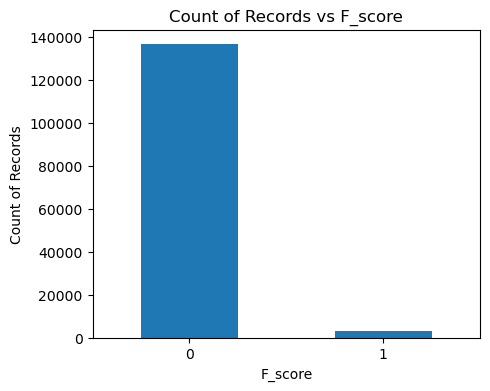

In [82]:
import matplotlib.pyplot as plt

# Calculate the count of records for each F_score value
f_score_counts = upsampled_data['F_score'].value_counts()

# Plot the counts vs F_score
plt.figure(figsize=(5, 4))
f_score_counts.plot(kind='bar')
plt.title('Count of Records vs F_score')
plt.xlabel('F_score')
plt.ylabel('Count of Records')
plt.xticks(rotation=0)

plt.show()


In [83]:
upsampled_data_Neg.shape , upsampled_data_Pos.shape

((45656, 13), (45226, 13))

### Coherence score for LDA

In [ ]:
import gensim
from gensim import corpora
from pprint import pprint
from gensim.models import CoherenceModel

documents = [i for i in upsampled_data_Neg['processed_text']
# Tokenize the documents
tokenized_documents = [doc.split() for doc in documents]
dictionary = corpora.Dictionary(tokenized_documents)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_documents]


# Create a list to store coherence scores
coherence_scores = []
for num_topics in range(2, 30):
    lda_model = gensim.models.LdaModel(
        doc_term_matrix,
        num_topics=num_topics,
        id2word=dictionary,
        passes=20,
        random_state=42
    )
    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_documents, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)


num = coherence_scores.index(max(coherence_scores))+2

lda_model = gensim.models.LdaModel(
    doc_term_matrix,
    num_topics = num,  # Number of topics to discover
    id2word=dictionary,
    passes=20,  # Number of passes through the data
    random_state=42)

# LDA for Negative Reviews

In [85]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
from nltk.tokenize import RegexpTokenizer

# Parameters
n_topics = num_topics
n_top_words = 10

# Initialize tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# Function to tokenize and remove stopwords
def preprocess(text):
    return [word for word in tokenizer.tokenize(text.lower()) if word not in STOPWORDS]

# Tokenize the text
processed_texts = upsampled_data_Neg['processed_text'].map(preprocess)

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(processed_texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(no_below=2, no_above=0.95, keep_n=1000)

# Create a corpus
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Fit LDA model
lda_model = LdaModel(corpus, num_topics=n_topics, id2word=dictionary, passes=5, random_state=0)

# Function to display topics
def print_top_words(lda_model, n_top_words):
    for idx, topic in lda_model.print_topics(-1):
        print("Topic: {} \nWords: {}".format(idx, topic ))

print_top_words(lda_model,n_top_words)

Topic: 0 
Words: 0.080*"phone" + 0.044*"work" + 0.043*"month" + 0.031*"warranti" + 0.030*"buy" + 0.021*"product" + 0.021*"stop" + 0.018*"repair" + 0.017*"replac" + 0.017*"issu"
Topic: 1 
Words: 0.155*"screen" + 0.069*"phone" + 0.031*"crack" + 0.029*"drop" + 0.025*"case" + 0.019*"black" + 0.019*"glass" + 0.018*"edg" + 0.016*"damag" + 0.015*"broke"
Topic: 2 
Words: 0.068*"phone" + 0.018*"time" + 0.017*"camera" + 0.015*"like" + 0.013*"screen" + 0.012*"use" + 0.010*"issu" + 0.009*"ive" + 0.008*"good" + 0.008*"im"
Topic: 3 
Words: 0.096*"phone" + 0.081*"work" + 0.033*"connect" + 0.025*"wifi" + 0.023*"doesnt" + 0.021*"hear" + 0.020*"speaker" + 0.017*"issu" + 0.017*"network" + 0.015*"return"
Topic: 4 
Words: 0.051*"phone" + 0.046*"app" + 0.042*"updat" + 0.023*"devic" + 0.023*"android" + 0.021*"use" + 0.018*"softwar" + 0.017*"window" + 0.010*"like" + 0.010*"download"
Topic: 5 
Words: 0.193*"unlock" + 0.052*"lock" + 0.049*"att" + 0.045*"el" + 0.043*"verizon" + 0.038*"compat" + 0.031*"la" + 0.03

In [106]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Parameters
n_features = 1000
n_topics = 30
n_top_words = 10 

# Text preprocessing and document-term matrix creation
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words='english')
dtm = vectorizer.fit_transform(upsampled_data_Neg['processed_text'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=5, learning_method='online', learning_offset=50., random_state=0)
lda.fit(dtm)

# Function to display topics
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

print_top_words(lda, vectorizer.get_feature_names_out(),n_top_words)


Topic #0: el la que lo en se est fono mi tel
Topic #1: disappoint model realli im fingerprint version id lte color display
Topic #2: new phone box use brand open broke alreadi receiv like
Topic #3: product amazon seller phone purchas warranti intern buy sold contact
Topic #4: look like dont phone know cell buy feel key garbag
Topic #5: phone unlock verizon att activ lock sprint carrier work use
Topic #6: order arriv got mean thought lost paid white replac phone
Topic #7: phone month issu bought start week pixel damag day replac
Topic #8: return low refund process minut complet burn unus immedi continu
Topic #9: phone updat problem issu defect reset away im stay softwar
Topic #10: phone buy bad good recommend review dont realli qualiti recept
Topic #11: bluetooth play headphon sound video miss car music connect make
Topic #12: origin item howev condit packag gp wrong renew glitch good
Topic #13: refurbish phone time restart day buy need wont worth place
Topic #14: devic camera function 

In [107]:
# Transforming the reviews to the topic distribution
topic_distribution = lda.transform(dtm)

# Identifying the dominant topic for each review
dominant_topic = np.argmax(topic_distribution, axis=1)

# Adding the dominant topic as a new column to the DataFrame
upsampled_data_Neg['dominant_topic'] = dominant_topic


C:\Users\yamin\AppData\Local\Temp\ipykernel_22976\300266941.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upsampled_data_Neg['dominant_topic'] = dominant_topic


In [108]:
topic_names = {
    1: "Model Disappointment and Features",
2: "New Phone Condition and Brand Perception"
,3: "Product Purchase and Seller Experience"
,4: "Phone Appearance and Feel"
,5: "Phone Unlocking and Carrier Compatibility"
,6: "Ordering and Receiving the Phone"
,7: "Phone Issues and Early Replacement"
,8: "Return Process and Refunds"
,9: "Phone Software Problems and Defects"
,10: "Phone Purchase Review and Quality"
,11: "Bluetooth and Audio Playback"
,12: "Packaging and Condition Discrepancies"
,13: "Refurbished Phone and Performance"
,14: "Device Hardware and Software Issues"
,15: "iPhone and Home Button Usage"
,16: "Note Series and Android Features"
,17: "Text Messaging and Notifications"
,18: "Battery Life and Charging"
,19: "Charger and Cable Issues"
,20: "Phone Scratch and Screen Protection"
,21: "Phone Functionality and Performance"
,22: "Screen Damage and Touch Sensitivity"
,23: "Customer Support and Repairs"
,24: "Payment and Communication Difficulties"
,25: "SIM Card, Wi-Fi, and Data Connectivity"
,26: "Speaker Problems and Audio Quality"
,27: "Camera and App Freezing"
,28: "App Usage and Phone Start-Up"
,29: "Waste of Money and Shipping Experience"
}

# Group by 'ProductID' and identify the most frequent 'dominant_topic'
dominant_topic_per_product = upsampled_data_Neg.groupby('ProductID')['dominant_topic'].agg(lambda x: x.value_counts().idxmax())

# Map the topic numbers to topic names
dominant_topic_per_product = dominant_topic_per_product.map(topic_names)

# Convert to DataFrame if needed
dominant_topic_per_product_df = dominant_topic_per_product.reset_index()

# Rename columns for clarity
dominant_topic_per_product_df.columns = ['ProductID', 'Negative_topic']

# Now, dominant_topic_per_product_df contains each ProductID with its most frequent topic name
dominant_topic_per_product_df


,ProductID,Negative_topic
0,B0000SX2UC,Note Series and Android Features
1,B0009N5L7K,Customer Support and Repairs
2,B000SKTZ0S,"SIM Card, Wi-Fi, and Data Connectivity"
3,B001AO4OUC,Phone Functionality and Performance
4,B001DCJAJG,Phone Purchase Review and Quality
...,...,...
633,B07ZG6W4S2,NaN
634,B07ZHPCJW3,Return Process and Refunds
635,B07ZPJBN55,NaN
636,B07ZPKZSSC,App Usage and Phone Start-Up


In [98]:
#Brands_df = pd.read_csv('Brands.csv')

In [109]:
Neg_final = pd.merge(dominant_topic_per_product_df, Brands_df[['asin', 'brand']], left_on='ProductID', right_on='asin').drop('asin', axis=1)
most_frequent_topics_per_brand = Neg_final.groupby('brand')['Negative_topic'].apply(lambda x: x.value_counts().idxmax())
most_frequent_topics_per_brand_df = most_frequent_topics_per_brand.reset_index(name='Recommendation')
most_frequent_topics_per_brand_df

,brand,Recommendation
0,ASUS,Note Series and Android Features
1,Apple,Phone Unlocking and Carrier Compatibility
2,Google,Phone Issues and Early Replacement
3,HUAWEI,App Usage and Phone Start-Up
4,Motorola,Phone Unlocking and Carrier Compatibility
5,Nokia,Phone Unlocking and Carrier Compatibility
6,OnePlus,Product Purchase and Seller Experience
7,Samsung,Phone Unlocking and Carrier Compatibility
8,Sony,Note Series and Android Features
9,Xiaomi,App Usage and Phone Start-Up


In [110]:
import pandas as pd

# Merge dataframes
Neg_final = pd.merge(dominant_topic_per_product_df, Brands_df[['asin', 'brand']], left_on='ProductID', right_on='asin').drop('asin', axis=1)

# Get the top 3 Negative topics per brand
top_3_topics_per_brand = Neg_final.groupby('brand')['Negative_topic'].apply(lambda x: x.value_counts().nlargest(3).index.tolist()).reset_index(name='Top_3_Negative_topics')

top_3_topics_per_brand


,brand,Top_3_Negative_topics
0,ASUS,"[Note Series and Android Features, SIM Card, W..."
1,Apple,"[Phone Unlocking and Carrier Compatibility, Ba..."
2,Google,"[Phone Issues and Early Replacement, Battery L..."
3,HUAWEI,"[App Usage and Phone Start-Up, Note Series and..."
4,Motorola,"[Phone Unlocking and Carrier Compatibility, No..."
5,Nokia,"[Phone Unlocking and Carrier Compatibility, Ph..."
6,OnePlus,"[Product Purchase and Seller Experience, Charg..."
7,Samsung,"[Phone Unlocking and Carrier Compatibility, Ph..."
8,Sony,"[Note Series and Android Features, Battery Lif..."
9,Xiaomi,"[App Usage and Phone Start-Up, Product Purchas..."


### Coherence score for LDA

In [ ]:
import gensim
from gensim import corpora
from pprint import pprint
from gensim.models import CoherenceModel

documents = [i for i in upsampled_data_Pos['processed_text']
# Tokenize the documents
tokenized_documents = [doc.split() for doc in documents]
dictionary = corpora.Dictionary(tokenized_documents)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_documents]


# Create a list to store coherence scores
coherence_scores = []
for num_topics in range(2, 30):
    lda_model = gensim.models.LdaModel(
        doc_term_matrix,
        num_topics=num_topics,
        id2word=dictionary,
        passes=20,
        random_state=42
    )
    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_documents, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)


num = coherence_scores.index(max(coherence_scores))+2

lda_model = gensim.models.LdaModel(
    doc_term_matrix,
    num_topics = num,  # Number of topics to discover
    id2word=dictionary,
    passes=20,  # Number of passes through the data
    random_state=42)

## LDA Model for Positive Reviews

In [123]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

n_features = 1000
n_topics = num_topics
n_top_words = 15 

# Text preprocessing and document-term matrix creation
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words='english')
dtm = vectorizer.fit_transform(upsampled_data_Pos['processed_text'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=5, learning_method='online', learning_offset=50., random_state=0)
lda.fit(dtm)

# Function to display topics
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

print_top_words(lda, vectorizer.get_feature_names_out(),n_top_words)


Topic #0: excelent producto telefono al est bien todo funciona bueno pero social para su bater fono
Topic #1: note expect complaint galaxi function extrem differ broke phone water durabl replac spen use exceed
Topic #2: fast easi phone use definit recommend set anyon oper learn transfer smooth old mom setup
Topic #3: el muy la lo que en buen fono tel mi precio se todo bien buena
Topic #4: new far look phone brand like work refurbish deliveri seller buy arriv bought satisfi happi
Topic #5: perfect verizon amazon activ phone plan store prime replac onlin gave bought cheaper data switch
Topic #6: iphon android galaxi phone window ive switch upgrad son compar os user year io sinc
Topic #7: time ship arriv describ reason item seller appear descript promis packag date troubl experi bit
Topic #8: love phone bought absolut satisfi daughter featur upgrad ive especi week hate total gotten rd
Topic #9: excel recommend highli phone user friendli besid kid pic state flash littl time keyboard base
T

In [140]:
# Transforming the reviews to the topic distribution
topic_distribution = lda.transform(dtm)

# Identifying the dominant topic for each review
dominant_topic = np.argmax(topic_distribution, axis=1)

# Adding the dominant topic as a new column to the DataFrame
upsampled_data_Pos['dominant_topic'] = dominant_topic

C:\Users\yamin\AppData\Local\Temp\ipykernel_22976\1653520563.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upsampled_data_Pos['dominant_topic'] = dominant_topic


In [147]:
topic_names = {
0: "Charging and USB Cable Considerations"
,1: "Phone Condition, Charger, and Accessories"
,2: "Phone Quality and Features"
,3: "Device Activation and Connectivity"
,4: "Great Phone at a Good Price"
,5: "Consideration for Upgrading to a New Phone"
,6: "Best Value Smartphone"
,7: "Worth the Purchase"
,8: "Love for the Phone"
,9: "Camera and Storage Considerations"
,11: "Issues with Unlocking and Power"
,13: "Amazon Purchase"
,14: "Recommendation and Skepticism"
,15: "User Experience and Phone Look"
,16: "Phone SIM Card and Network Use"
,17: "Happy with Purchase"
,19: "Phone Apps and Connectivity"
,20: "Android Experience and App Compatibility"
,21: "Battery Life and Usage"
,22: "Satisfaction with Galaxy Box Contents"
,23: "Good Quality and Performance"
,24: "Fingerprint Sensor and Features"
,25: "Excellent Phone"
,26: "Phone Condition and Delivery Satisfaction"
,27: "Screen Size and Headphone Compatibility"
,28: "Product Performance"
,29: "Carrier Performance and Gift Purchase"
}

# Group by 'ProductID' and identify the most frequent 'dominant_topic'
dominant_topic_per_product_p = upsampled_data_Pos.groupby('ProductID')['dominant_topic'].agg(lambda x: x.value_counts().idxmax())

# Map the topic numbers to topic names
dominant_topic_per_product_p = dominant_topic_per_product_p.map(topic_names)

# Convert to DataFrame if needed
dominant_topic_per_product_p_df = dominant_topic_per_product_p.reset_index()

# Rename columns for clarity
dominant_topic_per_product_p_df.columns = ['ProductID', 'Most_Frequent_traits_Topic']

In [148]:
Pos_final = pd.merge(dominant_topic_per_product_p_df, Brands_df[['asin', 'brand']], left_on='ProductID', right_on='asin').drop('asin', axis=1)
most_frequent_topics_per_brand = Pos_final.groupby('brand')['Most_Frequent_traits_Topic'].apply(lambda x: x.value_counts().idxmax())
most_frequent_topics_per_brand_P_df = most_frequent_topics_per_brand.reset_index(name='Positive Topics')
most_frequent_topics_per_brand_P_df 

,brand,Positive Topics
0,ASUS,Battery Life and Usage
1,Apple,Great Phone at a Good Price
2,Google,Great Phone at a Good Price
3,HUAWEI,Device Activation and Connectivity
4,Motorola,Phone Apps and Connectivity
5,Nokia,User Experience and Phone Look
6,OnePlus,User Experience and Phone Look
7,Samsung,Great Phone at a Good Price
8,Sony,Phone Apps and Connectivity
9,Xiaomi,Device Activation and Connectivity


# BERTopic for Negative Reviews

In [53]:
from bertopic import BERTopic
topic_model =  BERTopic(embedding_model = "all-MiniLM-L6-v2")
topics,probs = topic_model.fit_transform(upsampled_data_Neg['processed_text'])
df2 = topic_model.get_topic_info()
pd.set_option('display.max_colwidth', None)
df2['Representation']

ModuleNotFoundError: No module named 'bertopic'

# BERTopic for Positive Reviews

In [ ]:
from bertopic import BERTopic
topic_model =  BERTopic(embedding_model = "all-MiniLM-L6-v2")
topics,probs = topic_model.fit_transform(upsampled_data_Pos['processed_text'])
df_ = topic_model.get_topic_info()
pd.set_option('display.max_colwidth', None)
df_['Representation']

## Aspect Based Sentiment Analysis

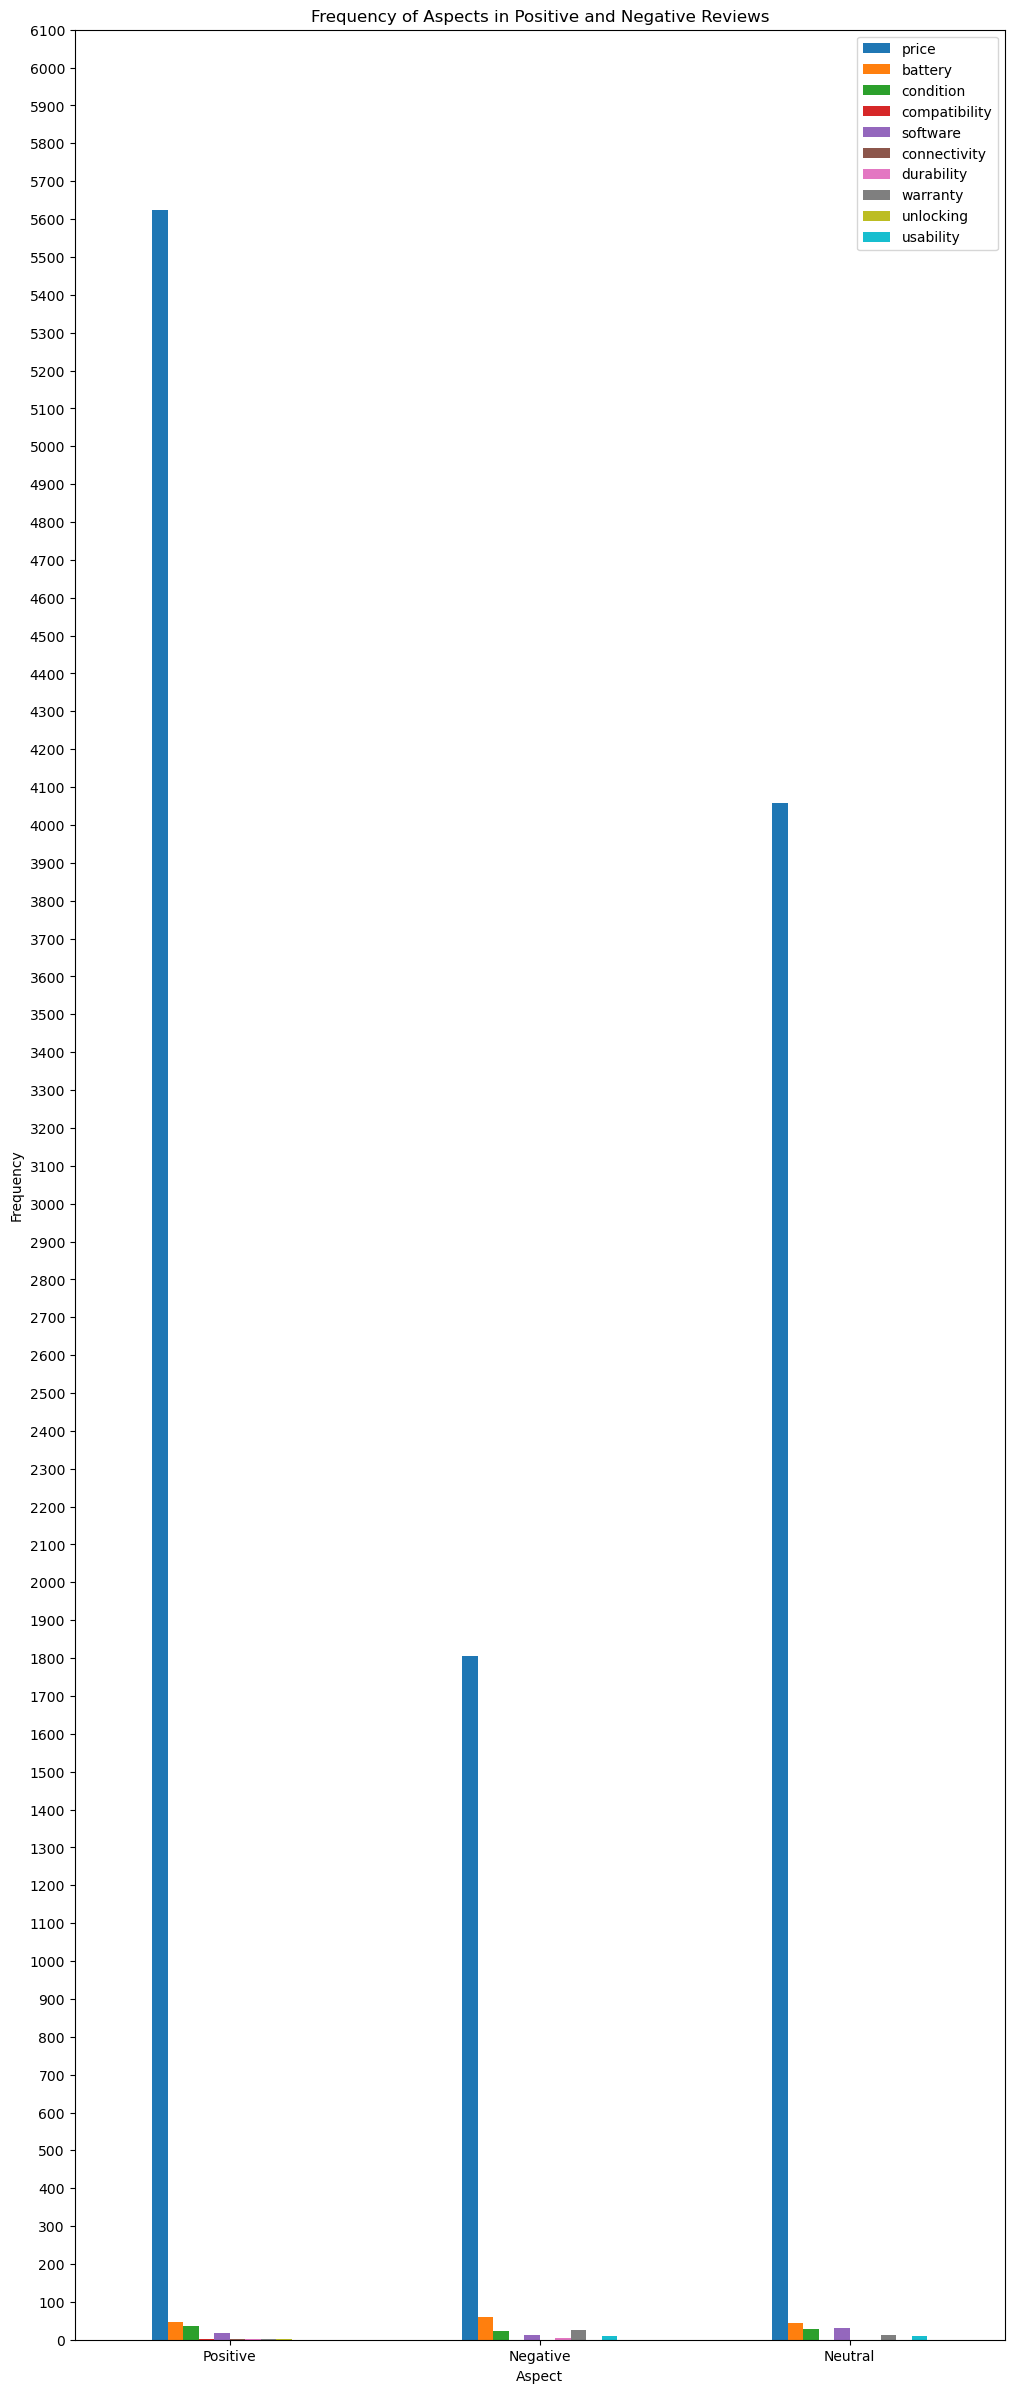

,price,battery,condition,compatibility,software,connectivity,durability,warranty,unlocking,usability
Positive,5623,46,36,1,19,1,2,2,1,0
Negative,1805,60,23,0,13,0,5,25,0,9
Neutral,4058,44,28,0,31,0,0,13,0,9


In [36]:
from collections import defaultdict

common_aspects = [
    "warranty",
    "condition",
    "compatibility",
    "unlocking",
    "battery",
    "price",
    "usability",
    "connectivity",
    "software",
    "durability"
]

aspect_frequency = defaultdict(lambda: defaultdict(int))

def identify_aspects(row):
    review_text = row['processed_text'].lower()
    sentiment = row['Sentiment']

    for aspect in common_aspects:
        if aspect in review_text:
            aspect_frequency[aspect][sentiment] += 1


upsampled_data.apply(identify_aspects, axis=1)

aspect_frequency_upsampled_data = pd.DataFrame.from_dict(aspect_frequency).fillna(0).astype(int)

aspect_frequency_upsampled_data.plot(kind='bar', figsize=(12, 30))
plt.title('Frequency of Aspects in Positive and Negative Reviews')
plt.xlabel('Aspect')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.yticks(range(0, max(aspect_frequency_upsampled_data.max()) + 500, 100))
plt.show()

aspect_frequency_upsampled_data

## Word Embedding on Negative Reviews

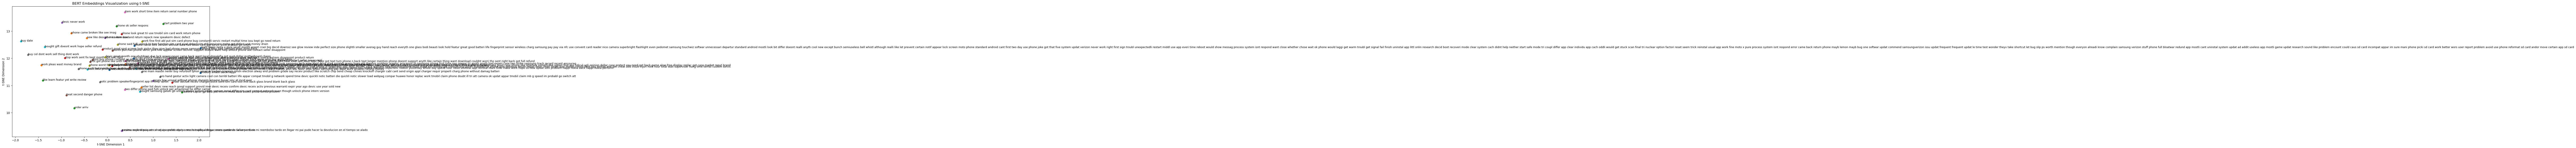

In [2]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Function to get embeddings from BERT
def get_bert_embeddings(sentences, model, tokenizer):
    inputs = tokenizer(sentences, return_tensors="pt", padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    # Use the mean of the last hidden states as the sentence representation
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

df = pd.read_csv("Negative_reviews.csv")

# Extract a sample of processed_texts for visualization
# If your dataset is large, it's advisable to use a smaller sample due to computational constraints
sample_processed_texts = df['processed_text'].sample(n=50, random_state=1) if len(df) > 50 else df['processed_text']

# Get embeddings
embeddings = get_bert_embeddings(sample_processed_texts.tolist(), model, tokenizer)

# Run t-SNE
tsne = TSNE(n_components=2, random_state=0)
embeddings_2d = tsne.fit_transform(embeddings.detach().numpy())

# Plotting
plt.figure(figsize=(12, 8))
for i, processed_text in enumerate(sample_processed_texts):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1])
    plt.annotate(processed_text, (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=9)
plt.title('BERT Embeddings Visualization using t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()
